In [84]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [85]:
import tensorflow as tf
from tensorflow import keras

In [86]:
keras.__version__

'2.9.0'

In [87]:
tf.__version__

'2.9.2'

In [88]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

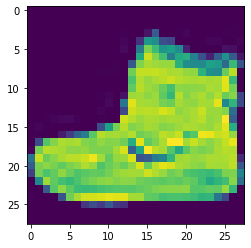

In [89]:
plt.imshow(X_train_full[0])

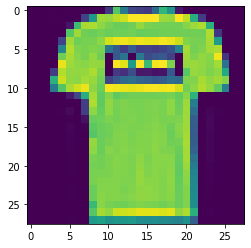

In [90]:
plt.imshow(X_train_full[1])

In [91]:
y_train_full[1]

0

In [92]:
y_train_full[0]

9

In [93]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [94]:
class_names[y_train_full[1]]

'T-shirt/top'

In [95]:
class_names[y_train_full[0]]

'Ankle Boot'

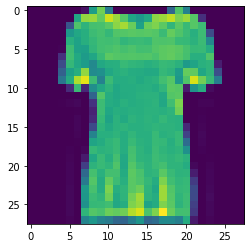

In [96]:
plt.imshow(X_train_full[10])  #just doing a random check.

In [97]:
class_names[y_train_full[10]]

'T-shirt/top'

In [98]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [99]:
# These are having 28 rows and 28 columns. The data is represented row by row. Where 0 means black and 255 means white. 

In [100]:
# Data Normalisation

In [101]:
X_train_n = X_train_full / 255.       #here, we are not dividing by 255 but by 255. or 255.0 so, that we get floating point number between 0 and 1
X_test_n= X_test /255.

In [102]:
# Training data: used to train the model
# Validation data: used for tuning the hyperparameter and evaluate the model
# Test data: used to test data after the model has gone through initial vetting by validation set.

In [103]:
X_valid, X_train= X_train_n[:5000],X_train_n[5000:]
y_valid, y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [104]:
# Validation data will be used to optimise the performance of our model.

In [105]:
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
model= keras.models.Sequential()    #using sequential API model
model.add(keras.layers.Flatten(input_shape=[28,28]))      #Flattening 28px by 28px images into 784px one D array
model.add(keras.layers.Dense(300,activation="relu"))      # 300 neurons are present in this hidden layer. As it is a hidden layer, we use ReLU Activation function.
model.add(keras.layers.Dense(100,activation="relu"))      # 100 neurons are present in this hidden layer. As it is a hidden layer, we use ReLu activation function.
model.add(keras.layers.Dense(10,activation="softmax"))   # 10 neurons as we require our result in 10 different categories. Softmax activation as we require only 1 as answer.

In [107]:
model.summary()     #summary of model, we have created.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [108]:
# 'None' in 'output Shape' represents 'the batch size' as we are will be doing Gradient Descent or Stocastic Gradient Descent and not Mini Batch Gradient Descent ,so, it will 
 # remain as 'None' .

In [109]:
#Param means weights and biases which w will use.
# Proof of 2nd row Param:
# (784x300) + (300) = 235500
#  weights    biases
# Same way to calculate other Params.

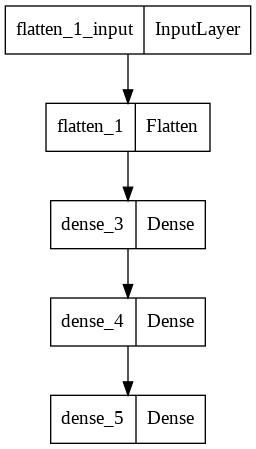

In [110]:
import pydot
keras.utils.plot_model(model)

In [111]:
# the above function helps to visulaize our model, first is input layer, then flatten layer , then dense layer, then followed by 2 more dense layers.

In [112]:
# weights and biases , are always assigned randomly. But we can receive information about those weights and biases using get_weight() method.

In [113]:
weights, biases= model.layers[1].get_weights()

In [114]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [115]:
weights.shape

(784, 300)

In [116]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [117]:
biases.shape

(300,)

In [118]:
# setting the learning procedure on our model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [119]:
#fitting data
model_history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4351 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4392 - accuracy: 0.8454 - val_loss: 0.5360 - val_accuracy: 0.7978
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4124 - accuracy: 0.8566 - val_loss: 0.3917 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3749 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8671 - val_loss: 0.3716 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3632 - accuracy: 0.8714 - val_loss: 0.3621 - val_accuracy:

In [120]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [121]:
model_history.history

{'loss': [0.7237027883529663,
  0.4842020273208618,
  0.43922898173332214,
  0.412444531917572,
  0.39395788311958313,
  0.37513676285743713,
  0.3632277250289917,
  0.3517501652240753,
  0.34148305654525757,
  0.33209365606307983,
  0.32405585050582886,
  0.3148830533027649,
  0.3080104887485504,
  0.30211520195007324,
  0.29458388686180115,
  0.28908002376556396,
  0.2837563455104828,
  0.2776043117046356,
  0.27278342843055725,
  0.2672877311706543,
  0.262274831533432,
  0.25757238268852234,
  0.25349682569503784,
  0.2482374608516693,
  0.24436022341251373,
  0.24045805633068085,
  0.2361312210559845,
  0.2326239049434662,
  0.22839932143688202,
  0.22510486841201782],
 'accuracy': [0.7643091082572937,
  0.831709086894989,
  0.8454363346099854,
  0.8565636277198792,
  0.8619090914726257,
  0.8671091198921204,
  0.871436357498169,
  0.8750908970832825,
  0.8789818286895752,
  0.8820182085037231,
  0.8840363621711731,
  0.8868181705474854,
  0.8893818259239197,
  0.8912727236747742,

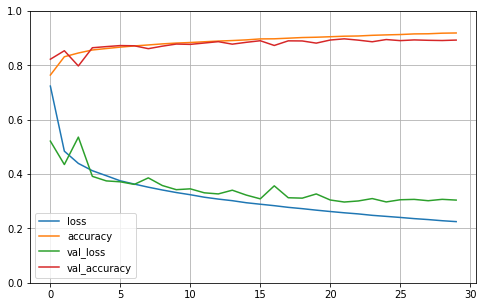

In [122]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [123]:
# if we run the whole program from the beginning ,we will see the plot for first 30 epochs . But if we run for 30 epochs again (not from beginning), we will see plot for next
# 30 epochs.

In [124]:
model.evaluate(X_test,y_test)   # evaluates performance of our model

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8835


[0.33657705783843994, 0.8834999799728394]

In [125]:
# first ouput above is loss and second is accuracy.
# Because above while setting learning procedure for our model we had set:
# model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [126]:
X_new=X_test[:3]

In [127]:
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 54ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [128]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [129]:
X_test.shape

(10000, 28, 28)

In [130]:
X_test[:3]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [131]:
X_test[:3].shape

(3, 28, 28)

In [132]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 17ms/step


array([[5.0682693e-06, 3.8687878e-07, 8.6616375e-05, 9.5469713e-06,
        4.5546503e-06, 1.3311332e-02, 6.4347478e-06, 2.7975447e-02,
        7.4758229e-04, 9.5785308e-01],
       [6.7911747e-06, 2.3545152e-08, 9.8767358e-01, 9.8683728e-09,
        1.2117408e-02, 5.4302244e-12, 2.0232741e-04, 3.8239203e-12,
        9.1380752e-09, 9.3071384e-12],
       [2.6903908e-06, 9.9999678e-01, 1.5785234e-08, 3.7491685e-07,
        1.3361456e-07, 1.0550686e-13, 5.9747807e-10, 2.5216298e-13,
        8.9244008e-09, 1.2900524e-12]], dtype=float32)

In [133]:
model.predict(X_test[:3]).round(2)

1/1 [==============================] - 0s 24ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [134]:
#some above steps were repetitions of their above steps.

AxesImage(54,36;334.8x217.44)


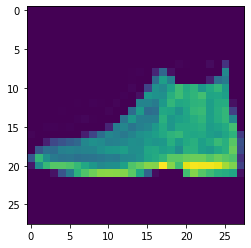

In [135]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


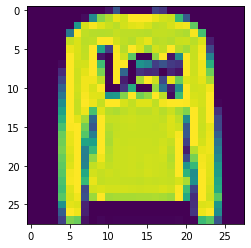

In [136]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


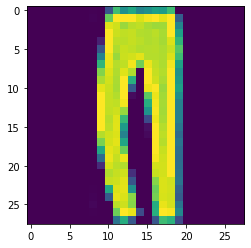

In [137]:
print(plt.imshow(X_test[2]))

In [138]:
X_test[0]   #pixels after prediction

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [139]:
X_test[1]   #pixels after prediction

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019